## CNN Model Code

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data paths
train_dir = 'chest_xray\\train'
test_dir = 'chest_xray\\test'
val_dir = 'chest_xray\\val'

# Data generators
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), class_mode='binary')
test_gen = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), class_mode='binary')
val_gen = val_datagen.flow_from_directory(val_dir, target_size=(150, 150), class_mode='binary')

# CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_gen, 
    epochs=10, 
    validation_data=val_gen
    
    )

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_gen)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Save the trained model
model.save('pneumonia_model.h5')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


c:\Users\samae\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\samae\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.8523 - loss: 0.5562 - val_accuracy: 0.8750 - val_loss: 0.3145
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 94s 578ms/step - accuracy: 0.9709 - loss: 0.0815 - val_accuracy: 0.8750 - val_loss: 0.3169
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 93s 568ms/step - accuracy: 0.9834 - loss: 0.0562 - val_accuracy: 1.0000 - val_loss: 0.0577
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 127s 778ms/step - accuracy: 0.9854 - loss: 0.0394 - val_accuracy: 0.9375 - val_loss: 0.0936
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 111s 681ms/step - accuracy: 0.9865 - loss: 0.0359 - val_accuracy: 1.0000 - val_loss: 0.0553
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9920 - loss: 0.0227 - val_accuracy: 0.9375 - val_loss: 0.2353
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.9967 - loss: 0.0100 - val_accuracy: 0.7500 - val_loss: 1.1502
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 150s 914ms/step - accuracy: 0.9876 - loss: 0.03

Test Accuracy: 0.72


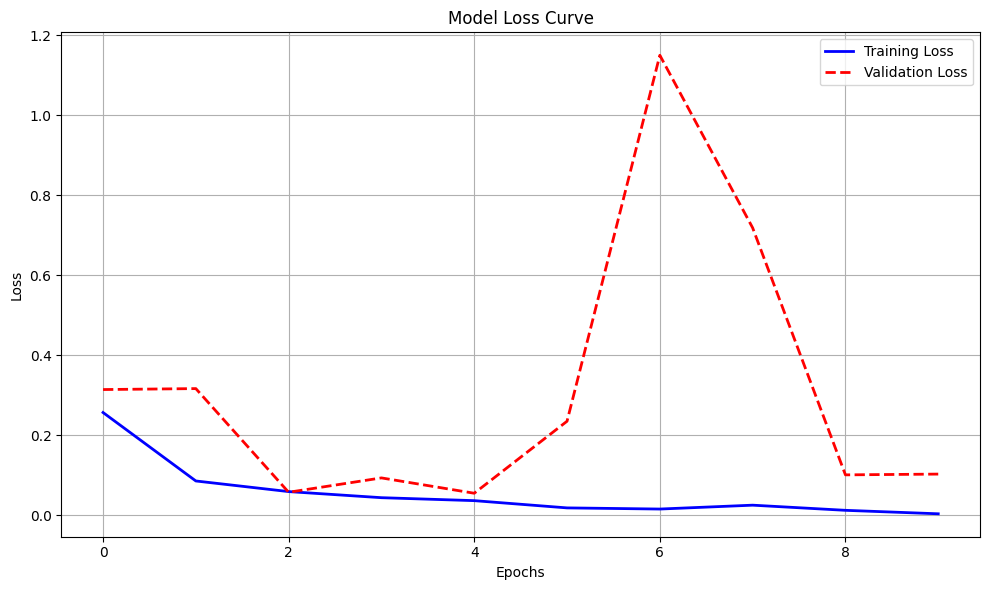

In [2]:
import matplotlib.pyplot as plt

# Function to plot loss curve
def plot_loss_curve(history):
    # Plot training & validation loss
    plt.figure(figsize=(10, 6))

    # Loss plot
    plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='--', linewidth=2)
    
    plt.title('Model Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    
    # Show the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Assuming you have the `history` object from your model training
# Call the function to plot the loss curve after training
plot_loss_curve(history)


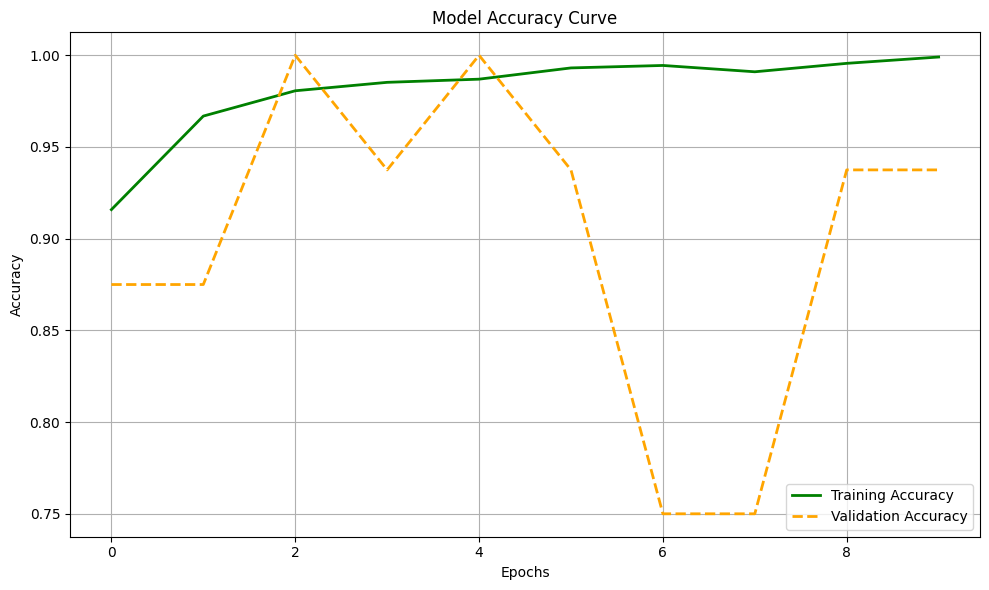

In [3]:
import matplotlib.pyplot as plt

# Function to plot accuracy curve
def plot_accuracy_curve(history):
    # Plot training & validation accuracy
    plt.figure(figsize=(10, 6))

    # Accuracy plot
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='green', linestyle='-', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--', linewidth=2)

    plt.title('Model Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Show the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Assuming you have the `history` object from your model training
# Call the function to plot the accuracy curve after training
plot_accuracy_curve(history)


## Rule-Based Expert System

In [2]:
def expert_system(prediction, age, symptoms):
    if prediction == "pneumonia":
        if age < 5 and any(symptoms[symptom] for symptom in ["fever", "cough", "difficulty_breathing"]):
            return "Refined Diagnosis: Pneumonia (Confirmed)"
        else:
            return "Refined Diagnosis: Possible False Positive, Further Checks Needed"
    else:
        return "Refined Diagnosis: Normal"

# Example usage
prediction = "pneumonia"
age = 4
symptoms = {"fever": True, "cough": True, "difficulty_breathing": False}

print(expert_system(prediction, age, symptoms))


Refined Diagnosis: Pneumonia (Confirmed)


## Web Interface

In [3]:
import tkinter as tk
from tkinter import filedialog, messagebox
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('best_pneumonia_model.keras')  # Or load your saved model

# Image Preprocessing
img_height = 150
img_width = 150

# Function to load the image and make prediction
def predict_pneumonia(image_path):
    try:
        # Open the image
        img = Image.open(image_path)
        
        # Convert grayscale to RGB if the image has only one channel
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        # Resize image to match input size
        img = img.resize((img_height, img_width))
        
        # Convert image to numpy array and normalize pixel values
        img = np.array(img) / 255.0
        
        # Check if the image has 3 channels (RGB)
        if img.shape[-1] != 3:
            raise ValueError("Input image must have 3 channels (RGB)")

        # Add batch dimension for the model input
        img = np.expand_dims(img, axis=0)
        
        # Predict using the model
        prediction = model.predict(img)
        
        # If prediction > 0.5, it's pneumonia
        if prediction > 0.5:
            return "Pneumonia"
        else:
            return "Normal"
    
    except Exception as e:
        messagebox.showerror("Error", f"Error processing the image: {str(e)}")
        return None

# Rule-Based System to assess severity
def assess_severity(symptoms, model_result):
    if model_result == "Normal":
        return "No pneumonia detected. No severity to assess."

    # Rule-based severity assessment
    fever = symptoms['fever']
    cough = symptoms['cough']
    difficulty_breathing = symptoms['difficulty_breathing']

    # Severity rules
    if fever and difficulty_breathing:
        severity = "High"
    elif fever or difficulty_breathing:
        severity = "Moderate"
    elif cough:
        severity = "Low"
    else:
        severity = "Mild"
    
    return f"Pneumonia detected. Severity: {severity}"

# Function to open file dialog and predict, then assess severity
def upload_and_predict():
    try:
        # Open file dialog for user to select an image
        file_path = filedialog.askopenfilename(
            title="Select a Chest X-ray Image",
            filetypes=[("Image files", "*.jpg;*.jpeg;*.png")]
        )
        
        if file_path:  # If user selected a file
            # Ensure the path is in a valid format for all OS
            file_path = file_path.replace("\\", "/")
            
            # Predict using the model
            result = predict_pneumonia(file_path)
            
            if result == "Pneumonia":
                # If pneumonia is detected, ask for symptoms to assess severity
                ask_for_symptoms(result)
            else:
                messagebox.showinfo("Prediction Result", f"The result is: {result}")
        
        else:
            messagebox.showwarning("No file", "No image selected!")
    
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")

# Function to ask for symptoms and assess severity
def ask_for_symptoms(model_result):
    # Create a new window to ask for symptoms
    symptoms_window = tk.Toplevel(window)
    symptoms_window.title("Enter Symptoms")
    
    # Set window size and background color
    symptoms_window.geometry("500x400")
    symptoms_window.configure(bg="#f7f9fc")
    
    # Variables to store symptoms input
    fever_var = tk.BooleanVar()
    cough_var = tk.BooleanVar()
    difficulty_breathing_var = tk.BooleanVar()
    
    # Title Label
    tk.Label(
        symptoms_window, 
        text="Symptom Assessment",
        font=("Segoe UI", 18, "bold"),
        bg="#f7f9fc",
        fg="#2a6f97"
    ).pack(pady=20)
    
    # Create a frame to align the checkboxes
    checkbox_frame = tk.Frame(symptoms_window, bg="#f7f9fc")
    checkbox_frame.pack(pady=10)
    
    # Create aligned checkboxes for symptoms
    tk.Checkbutton(
        checkbox_frame, 
        text="Fever", 
        variable=fever_var,
        font=("Segoe UI", 14),
        bg="#f7f9fc",
        fg="#4a4a4a",
        anchor="w",
        justify="left"
    ).grid(row=0, column=0, sticky="w", padx=20, pady=5)
    tk.Checkbutton(
        checkbox_frame, 
        text="Cough", 
        variable=cough_var,
        font=("Segoe UI", 14),
        bg="#f7f9fc",
        fg="#4a4a4a",
        anchor="w",
        justify="left"
    ).grid(row=1, column=0, sticky="w", padx=20, pady=5)
    tk.Checkbutton(
        checkbox_frame, 
        text="Difficulty Breathing", 
        variable=difficulty_breathing_var,
        font=("Segoe UI", 14),
        bg="#f7f9fc",
        fg="#4a4a4a",
        anchor="w",
        justify="left"
    ).grid(row=2, column=0, sticky="w", padx=20, pady=5)
    
    # Function to submit and assess severity
    def submit_symptoms():
        symptoms = {
            'fever': fever_var.get(),
            'cough': cough_var.get(),
            'difficulty_breathing': difficulty_breathing_var.get()
        }
        severity = assess_severity(symptoms, model_result)
        messagebox.showinfo("Severity Assessment", severity)
        symptoms_window.destroy()  # Close the symptoms window
    
    # Submit button
    submit_button = tk.Button(
        symptoms_window, 
        text="Submit Symptoms", 
        command=submit_symptoms,
        font=("Segoe UI", 14, "bold"),
        bg="#2a6f97",
        fg="#ffffff",
        activebackground="#1e5d7c",
        activeforeground="#ffffff"
    )
    submit_button.pack(pady=20)

# Create the Tkinter window
window = tk.Tk()
window.title("Pneumonia Detection System")

# Set window size and background color
window.geometry("600x500")
window.configure(bg="#eaf4fc")

# Header Section
header_frame = tk.Frame(window, bg="#eaf4fc", pady=10)
header_frame.pack(fill="x")
header_label = tk.Label(
    header_frame,
    text="Pneumonia Detection Using Chest X-rays",
    font=("Segoe UI", 20, "bold"),
    bg="#eaf4fc",
    fg="#2a6f97"
)
header_label.pack()

# Instructions Section
instructions_frame = tk.Frame(window, bg="#ffffff", pady=20, padx=20, relief="groove", bd=2)
instructions_frame.pack(pady=20, padx=20, fill="both", expand=True)
instructions_label = tk.Label(
    instructions_frame,
    text="Upload a chest X-ray image to detect signs of pneumonia and assess severity.",
    font=("Segoe UI", 14),
    bg="#ffffff",
    fg="#4a4a4a",
    wraplength=500,
    justify="center"
)
instructions_label.pack(pady=10)

# Upload Button
upload_button = tk.Button(
    instructions_frame,
    text="Upload Image",
    font=("Segoe UI", 16, "bold"),
    bg="#2a6f97",
    fg="#ffffff",
    activebackground="#1e5d7c",
    activeforeground="#ffffff",
    command=upload_and_predict
)
upload_button.pack(pady=20)

# Footer Section
footer_frame = tk.Frame(window, bg="#eaf4fc", pady=5)
footer_frame.pack(fill="x", side="bottom")
footer_label = tk.Label(
    footer_frame,
    text="© 2024 Medical Insights | All Rights Reserved",
    font=("Segoe UI", 10),
    bg="#eaf4fc",
    fg="#6c757d"
)
footer_label.pack()

# Run the Application
window.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
